In [109]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer, InterclusterDistance
from sklearn.cluster import KMeans
from functions import functions as utils2


In [110]:
df=pd.read_csv('data/cleaned_and_normalized_customer.csv')

In [111]:
df.customer_unique_id.nunique()

94088

In [112]:
df.shape

(94088, 29)

In [113]:
cols_with_categories = [col for col in df.columns.tolist() 
                        if col not in ['customer_unique_id','main_favorite_category','customer_state']
                        if not col.startswith('pca')
                       ]

In [114]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94088 entries, 0 to 94087
Data columns (total 29 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   customer_unique_id               94088 non-null  object 
 1   nb_orders                        94088 non-null  float64
 2   mean_nb_products                 94088 non-null  float64
 3   total_price_spent                94088 non-null  float64
 4   total_freight_value_spent        94088 non-null  float64
 5   total_spent                      94088 non-null  float64
 6   mean_delay_delivery_time         94088 non-null  float64
 7   mean_review_score                94088 non-null  float64
 8   mean_count_payment_sequential    94088 non-null  float64
 9   mean_total_payment_installments  94088 non-null  float64
 10  favorite_month                   94088 non-null  int64  
 11  main_favorite_category           94088 non-null  object 
 12  last_review_score 

In [115]:
df.head()

,customer_unique_id,nb_orders,mean_nb_products,total_price_spent,total_freight_value_spent,total_spent,mean_delay_delivery_time,mean_review_score,mean_count_payment_sequential,mean_total_payment_installments,...,x0_electronics,x0_fashion_and_cloth_shoes,x0_foods_and_drinks,x0_health_beauty,x0_house_ware_and_accessories,x0_others,x0_sports_and_accessories,x0_toys_and_game_gift,pca_categories_0,pca_not_categories_0
0,0000366f3b9a7992bf8c76cfdf3221e2,-0.287463,-0.267739,-0.060453,-0.506250,-0.108763,-0.651462,0.679024,-0.11763,1.844044,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,-126.627961,-179.078972
1,0000b849f77a49e4a4ce2b2a4ca5be3f,-0.287463,-0.267739,-0.567936,-0.666015,-0.608235,-0.982529,-0.078718,-0.11763,-0.724509,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,-123.639114,-174.852122
2,0000f46a3911fa3c0805444483337064,-0.287463,-0.267739,-0.338883,-0.281460,-0.351206,1.394965,-0.836459,-0.11763,1.844044,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,298.950326,422.779599
3,0000f6ccb0745a6a4b88665a16c9f078,-0.287463,-0.267739,-0.535521,-0.263804,-0.536696,0.791786,-0.078718,-0.11763,0.376300,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,82.977076,117.347306
4,0004aac84e0df4da2b147fca70cf8255,-0.287463,-0.267739,0.168600,-0.295671,0.130676,0.061369,0.679024,-0.11763,1.110172,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,50.007406,70.721151


## Partie 1 Clustering avec Kmeans

### 1 -  Kmeans 

In [116]:
X=np.array(df['pca_categories_0']).reshape((len(df['pca_categories_0']), 1))
#X=df[cols_with_categories].values

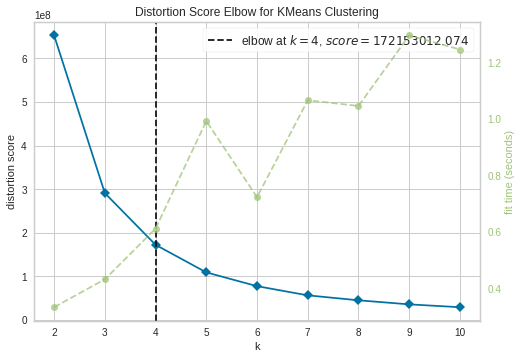

In [117]:

kmeans_visualizer = KElbowVisualizer(KMeans(),K=(2,6))
kmeans_visualizer.fit(X)
kmeans_visualizer.show()

Selon la méthode du coude, K=4 comme nombre de cluster semble être le nombre optimal de clusters

In [118]:
random_state=42
K=kmeans_visualizer.elbow_value_

kmeans = KMeans(n_clusters=K,random_state=random_state)
kmeans.fit(X)

KMeans(n_clusters=4, random_state=42)

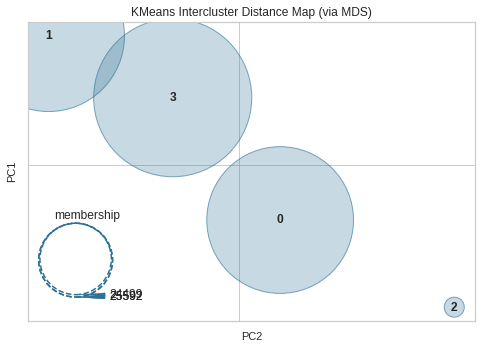

In [119]:
InterclusterDistance(KMeans(kmeans_visualizer.elbow_value_)).fit(X).show()
 

La séparation des clusters reste limite, en particulier les 3 clusters très proches entre eux

In [120]:
df['kmeans_label_1']=kmeans.labels_
kmeans_clusters = df.groupby("kmeans_label_1").mean().reset_index()
cols=[col for col in kmeans_clusters.columns.tolist() if not col.startswith('x0')]
#kmeans_clusters=kmeans_clusters[cols]
#cols

In [121]:
utils2.plot_radars(kmeans_clusters,"kmeans_label_1",[0,1,2,3,4])
#plot_radars(kmeans_clusters,"kmeans_label_1",[2,3])
 
 
            
#exlude_cols=[col for col in kmeans_clusters.columns.tolist() if col not in ['kmeans_label_1','kmeans_label_2','index']  if not col.startswith('pca')]
#utils2.plot_radars(kmeans_clusters, 'kmeans_label_1','moyennes des variables par clusters',exlude_cols)


### 2 -  Cluster 0 

In [122]:
utils2.plot_radars(kmeans_clusters,"kmeans_label_1",[0])

Cluster 0: regroupe les clients de Sao polo où s'opèrent plus de ventes.Les chiffres d'affaires (prix et cout de frêt) sont plus élevés, et les retours des clients très positifs.Ces derniers font leurs achats entre janvier et juin, et le délai de livraison est très faible

### 3 -  Cluster 1

In [123]:
utils2.plot_radars(kmeans_clusters,"kmeans_label_1",[1])

Cluster 1: regroupe les clients hors de Sao polo.Les chiffres d'affaires (prix et cout de frêt) sont moins élevés, et les retours des clients très moyens voir pas.Ces derniers font leurs achats en début d'année, et cela concerne des produits de catégories agroalimentaire et sports, et optent, le plus souvent, pour des paiements échelonnés

### 4 -  Cluster 2

In [124]:
utils2.plot_radars(kmeans_clusters,"kmeans_label_1",[2])

Cluster 2: regroupe les clients hors de Sao polo.Les avis des ces derniers sont très moyens, avec des délais de livraison un peu plus allongés même si les couts de frets sont moins élevés.Les categories de produits,concernées le plus, sont les appareils électroniques,le cinéma et la littérature

### 5 -  Cluster 3

In [125]:
utils2.plot_radars(kmeans_clusters,"kmeans_label_1",[3])

Cluster 3: regroupe les clients hors de Sao polo.Les avis des ces derniers sont très moyens, avec des délais de livraison raisonables.Les categories de produits,concernées le plus, sont les appareils l'automobile,le cinéma et la littérature.Ces clients font plus leur achats en fin d'année, et enregistrent plus d'articles achetés

### 6 -  Stabilité à l'initialisation du K-Means

In [126]:
print("Scores de stabilité à l'initialisation")
print(53 * '_')
print(82 * "_")
print("init\t\ttime\tinertia\thomo\tcompl\tv-meas\tARI\tAMI\tsilhouette")
for i in range(11):
    utils2.bench_k_means(kmeans=kmeans, name="k-means++", data=X, labels=kmeans.labels_)
   

print(90 * '_')

Scores de stabilité à l'initialisation
_____________________________________________________
__________________________________________________________________________________
init		time	inertia	homo	compl	v-meas	ARI	AMI	silhouette
k-means++	0.697s	7339	1.000	1.000	1.000	1.000	1.000	0.582
k-means++	0.548s	7339	1.000	1.000	1.000	1.000	1.000	0.565
k-means++	0.546s	7339	1.000	1.000	1.000	1.000	1.000	0.577
k-means++	0.549s	7339	1.000	1.000	1.000	1.000	1.000	0.564
k-means++	0.539s	7339	1.000	1.000	1.000	1.000	1.000	0.547
k-means++	0.536s	7339	1.000	1.000	1.000	1.000	1.000	0.546
k-means++	0.569s	7339	1.000	1.000	1.000	1.000	1.000	0.552
k-means++	0.551s	7339	1.000	1.000	1.000	1.000	1.000	0.553
k-means++	0.536s	7339	1.000	1.000	1.000	1.000	1.000	0.514
k-means++	0.556s	7339	1.000	1.000	1.000	1.000	1.000	0.546
k-means++	0.612s	7339	1.000	1.000	1.000	1.000	1.000	0.552
__________________________________________________________________________________________


Les 11 itérations montrent des inerties proches, une bonne homogénéité et un score AMI proche de 1. On peut en déduire une bonne stabilité à l'initialisation du modèle K-Means